In [1]:
%matplotlib inline

from random import randrange
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.base import clone, BaseEstimator, ClassifierMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
import matplotlib.pyplot as plt

### Custom Bagging Classifier

In [2]:
class MyBaggingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, 
                 base_estimator=DecisionTreeClassifier(max_depth=2), 
                 n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.estimators_ = []
    
    def fit(self, X_train, y_train):
        ratio = 0.9
        size = X_train.shape[0]
        while len(self.estimators_) < self.n_estimators:
            estimator = clone(self.base_estimator)
            idx = self.__subsample(size, ratio)
#             idx = np.random.randint(size, size=ratio*size)
            data, target = X_train[idx, :], y_train[idx]
            estimator = estimator.fit(data, target)
            self.estimators_.append(estimator)
        return self
    
    def predict(self, X):
        predictions = [e.predict(X) for e in self.estimators_]
        predictions = list(zip(*predictions))
        counts = [np.bincount(x) for x in predictions]
        counts = [np.argmax(x) for x in counts]
        return counts
    
    def __subsample(self, size, ratio=1.0):
        sample = list()
        n_sample = round(size * ratio)
        while len(sample) < n_sample:
            index = randrange(size)
            sample.append(index)
        return sample

### Data methods

In [3]:
def load_data(n_samples=500):
    X, y = make_classification(n_samples=n_samples)
    return train_test_split(X, y, test_size=0.2)

def get_scores(n_samples):
    (X_train, X_test, y_train, y_test) = load_data(n_samples)
    n_estimators = [1, 10, 100, 250, 500, 1000]
    classifiers = [[
        ('RandomForestClassifier', RandomForestClassifier(max_features=5, n_estimators=n)),
        ('GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=n)),
        ('BaggingClassifier', BaggingClassifier(n_estimators=n)),
        ('MyBaggingClassifier', MyBaggingClassifier(n_estimators=n)),
    ] for n in n_estimators]
    names = [clf[0] for clf in classifiers[0]]
    scores = np.asarray([[
        x[1].fit(X_train, y_train).score(X_test, y_test) for x in clf
    ] for clf in classifiers])
    return (scores, n_estimators, names)
                
def plot_scores(scores, estimators, names):
    for index, column in enumerate(scores.T):
        print(names[index], list(zip(estimators, column)))
        plt.semilogx(estimators, column, lw=4, label=names[index])
    plt.legend(loc='lower right')
    plt.xlim([min(estimators), max(estimators)])
    plt.ylim([min(scores.ravel()) - 0.01, max(scores.ravel()) + 0.01])
    plt.show()

### Small Dataset

RandomForestClassifier [(1, 0.85), (10, 0.95), (100, 0.95), (250, 0.95), (500, 0.95), (1000, 0.95)]
GradientBoostingClassifier [(1, 0.95), (10, 0.96), (100, 0.96), (250, 0.96), (500, 0.96), (1000, 0.96)]
BaggingClassifier [(1, 0.93), (10, 0.94), (100, 0.95), (250, 0.95), (500, 0.95), (1000, 0.95)]
MyBaggingClassifier [(1, 0.96), (10, 0.92), (100, 0.93), (250, 0.93), (500, 0.93), (1000, 0.93)]


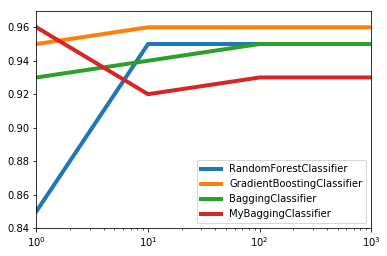

CPU times: user 15.8 s, sys: 53.5 ms, total: 15.9 s
Wall time: 16.2 s


In [4]:
%%time

scores, estimators, names = get_scores(500)
plot_scores(scores, estimators, names)

### Large Dataset

RandomForestClassifier [(1, 0.953), (10, 0.971), (100, 0.976), (250, 0.978), (500, 0.979), (1000, 0.979)]
GradientBoostingClassifier [(1, 0.95), (10, 0.95), (100, 0.979), (250, 0.978), (500, 0.972), (1000, 0.972)]
BaggingClassifier [(1, 0.952), (10, 0.976), (100, 0.974), (250, 0.976), (500, 0.975), (1000, 0.975)]
MyBaggingClassifier [(1, 0.942), (10, 0.94), (100, 0.941), (250, 0.942), (500, 0.941), (1000, 0.943)]


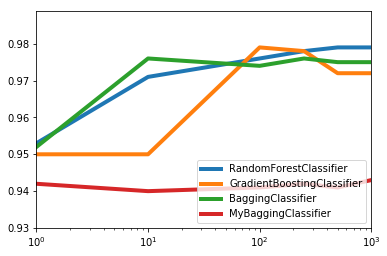

CPU times: user 2min 41s, sys: 157 ms, total: 2min 41s
Wall time: 2min 49s


In [5]:
%%time

scores, estimators, names = get_scores(5000)
plot_scores(scores, estimators, names)